## Raghav Gupta E19CSE258

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

## Reading the data and checking for null values and handling them

In [140]:
data = pd.read_csv('./1994_census_income.csv')

In [141]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,?,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,?,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [142]:
data.replace('?',np.nan,inplace=True)

In [143]:
def HandleMissingValues(data):
    j = 0
    imp = SimpleImputer(missing_values = np.NaN,strategy="most_frequent")
    Col = data.columns
    for i in data.isnull().sum():
        if(i!=0):
            data[Col[j]] = imp.fit_transform(data[[Col[j]]])
        j+=1

In [144]:
HandleMissingValues(data)
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,9,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [145]:
def LabelEncode():
    string_columns = []
    for i in data.columns:
        if type(data[i][0]) == str :
            string_columns.append(i)
    print(string_columns)
    le = LabelEncoder()
    for i in string_columns:
        data[i] = le.fit_transform(data[[i]])
        print(le.classes_)

In [146]:
LabelEncode()

['workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country', 'high_income']
['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']
['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
['1' '10' '11' '12' '13' '14' '15' '16' '2' '3' '4' '5' '6' '7' '8' '9']
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
[

/home/lord/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [147]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,6,77516,9,4,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,4,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,15,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,13,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,15,2,9,5,2,0,0,0,40,4,0


In [148]:
data.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,6,77516,9,4,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,4,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,15,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,13,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,15,2,9,5,2,0,0,0,40,4,0
5,37,3,284582,12,5,2,3,5,4,0,0,0,40,38,0
6,49,3,160187,6,11,3,7,1,2,0,0,0,16,22,0
7,52,5,209642,11,15,2,3,0,4,1,0,0,45,38,1
8,31,3,45781,12,5,4,9,1,4,0,14084,0,50,38,1
9,42,3,159449,9,4,2,3,0,4,1,5178,0,40,38,1


## Visualising the data to determine features to driop and finding outliers

In [149]:
def checkForOutliers():
    for i in data.columns:
        plt.xlabel(i)
        plt.boxplot(data[i])
        plt.show()

<AxesSubplot:>

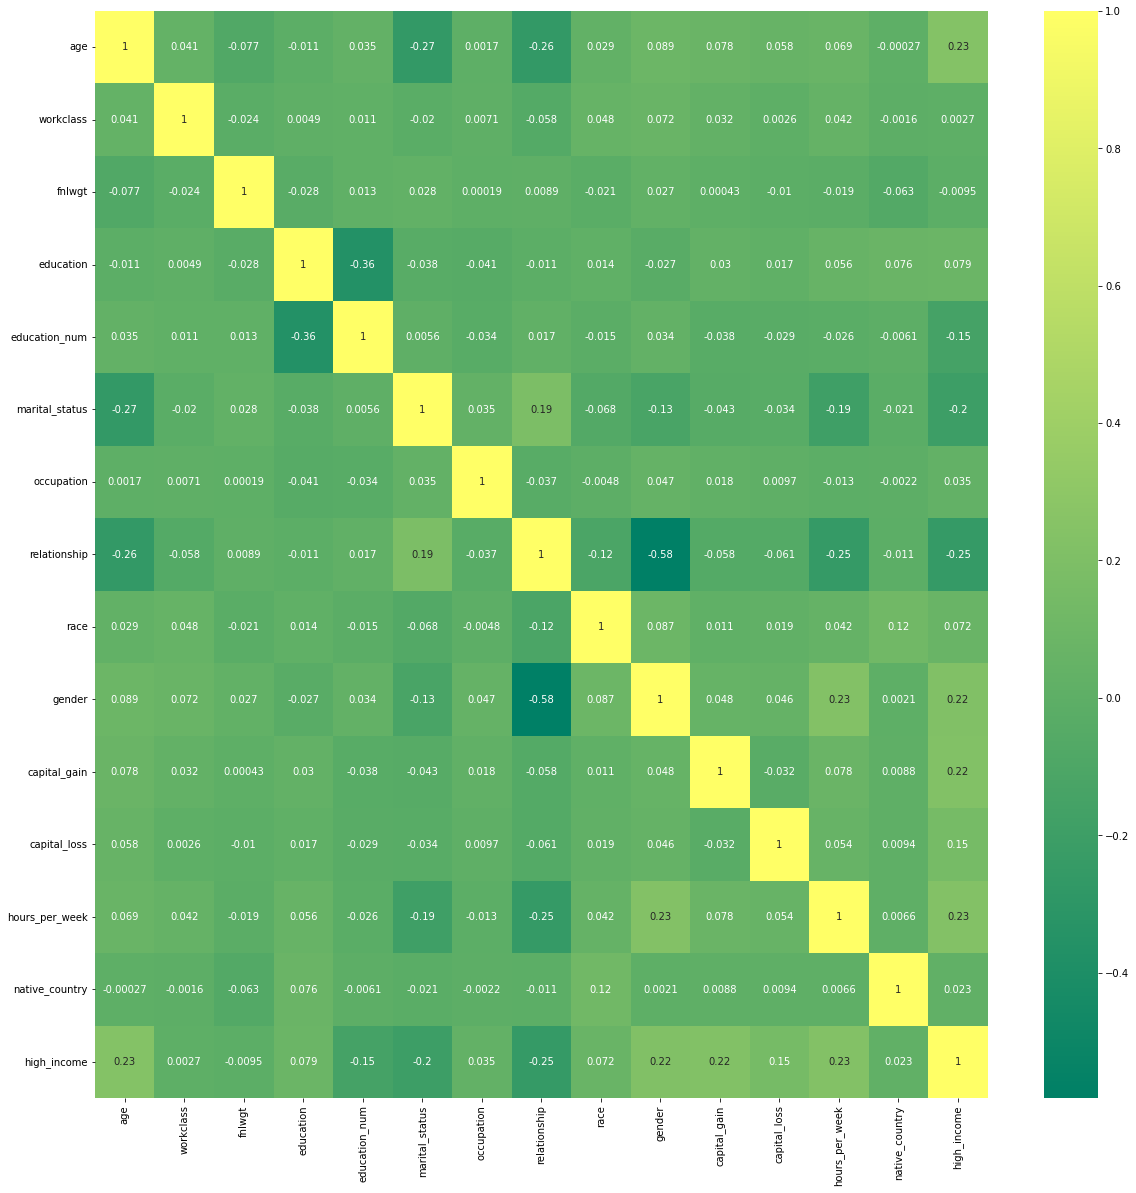

In [150]:
plt.figure(figsize=(20,20))
snb.heatmap(data.corr(),annot=True,cmap='summer')

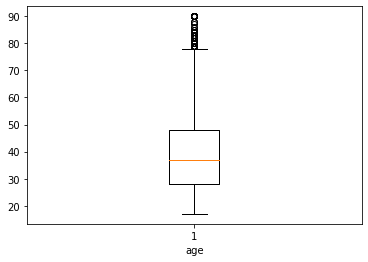

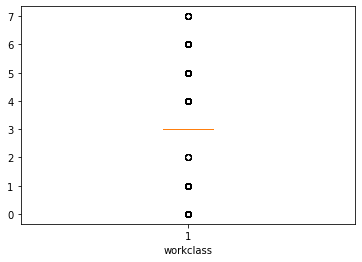

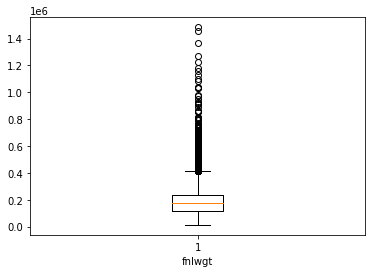

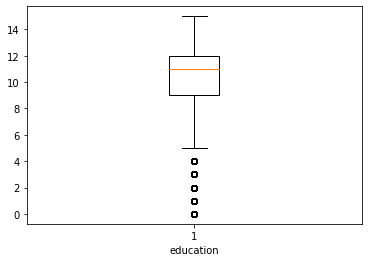

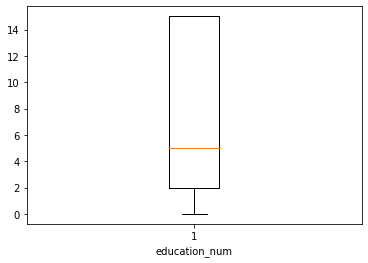

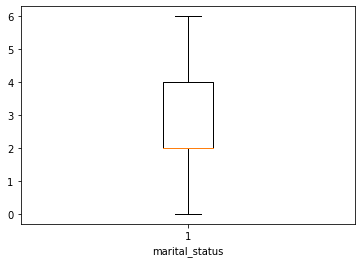

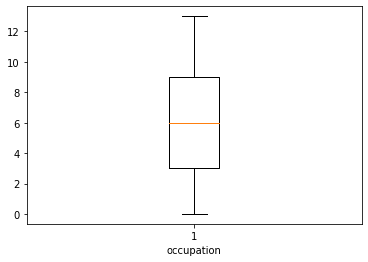

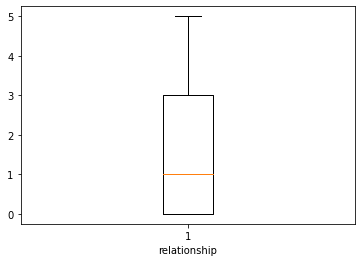

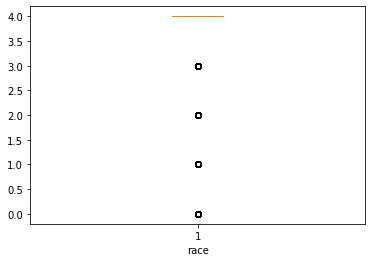

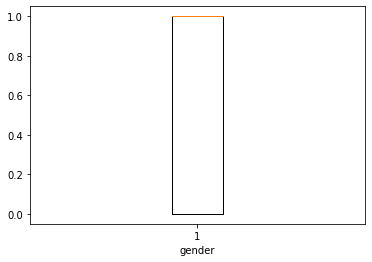

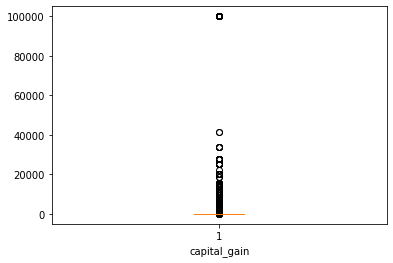

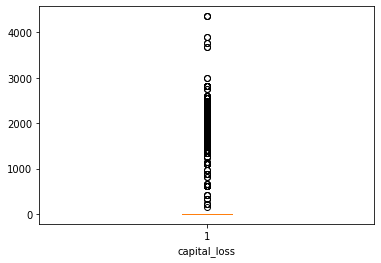

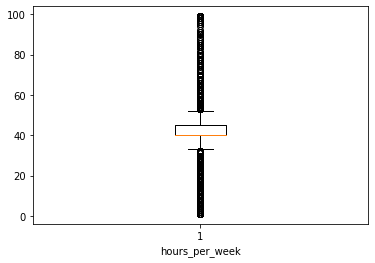

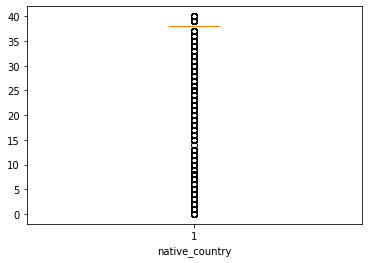

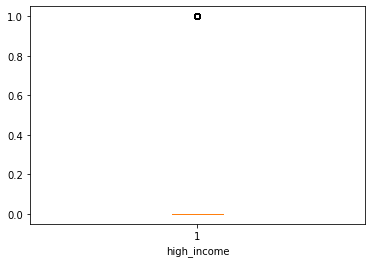

In [151]:
checkForOutliers()

In [152]:
outliers = ['age', 'workclass', 'fnlwgt', 'education','capital_gain', 'capital_loss', 'hours_per_week', 'native_country','high_income','race']
def treatOutliers(arr):
    for i in arr:
        temp = stats.mstats.winsorize(data[i],limits=0.05)
        data[i] = np.array(temp)

In [153]:
treatOutliers(outliers)

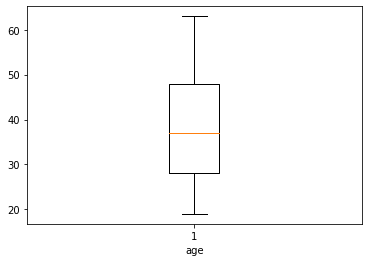

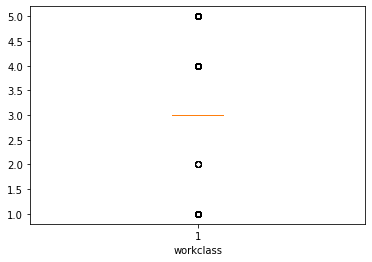

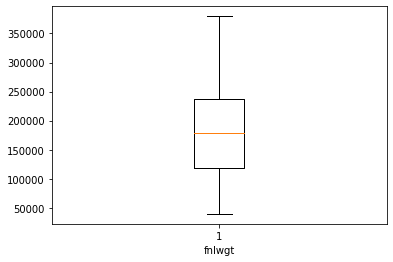

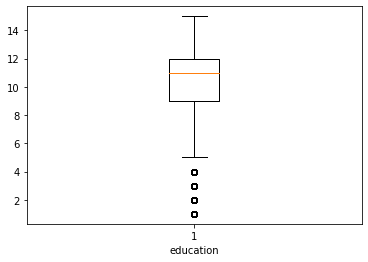

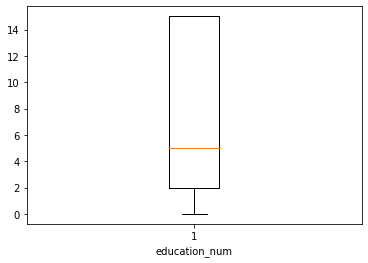

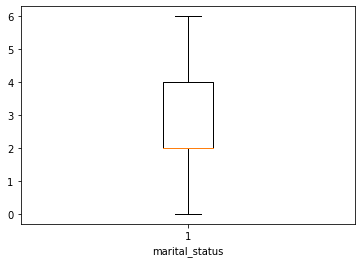

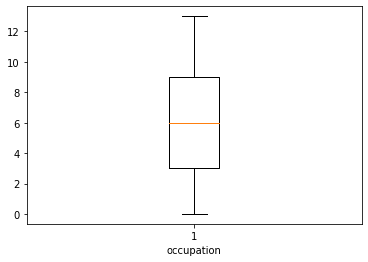

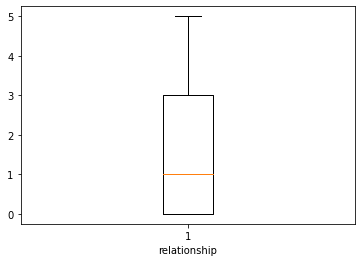

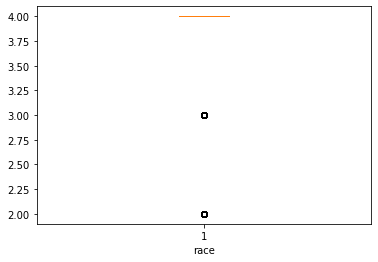

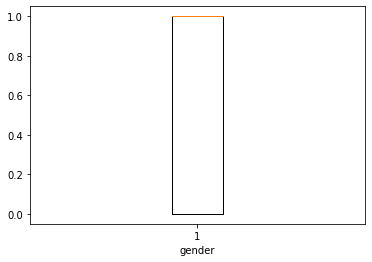

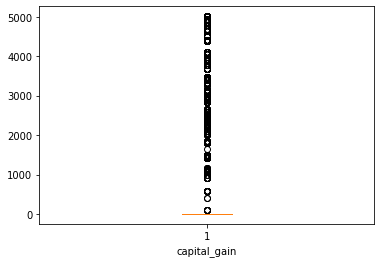

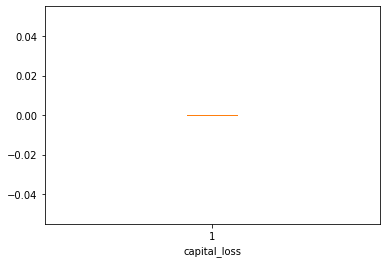

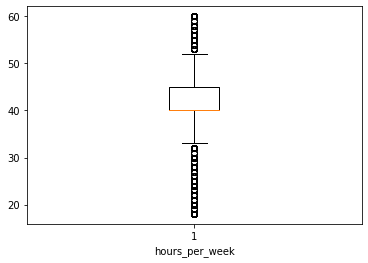

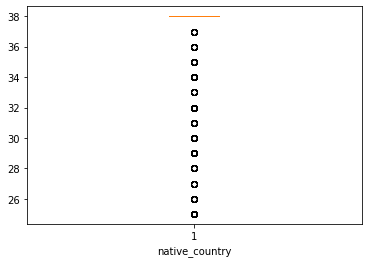

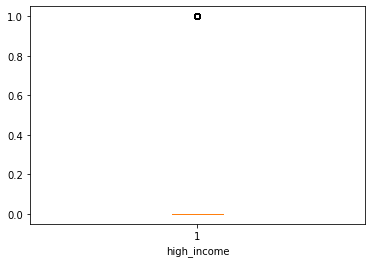

In [154]:
checkForOutliers()

## Making Model

In [155]:
def DecisionTree(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_pred , y_test))

In [156]:
X = data[['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']].values
y = data[['high_income']].values

In [157]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,train_size=0.7)

In [158]:
DecisionTree(RandomForestClassifier())

/tmp/ipykernel_2672/445697625.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


              precision    recall  f1-score   support

           0       0.92      0.89      0.90      7789
           1       0.61      0.68      0.64      1980

    accuracy                           0.85      9769
   macro avg       0.76      0.79      0.77      9769
weighted avg       0.85      0.85      0.85      9769



In [159]:
DecisionTree(RandomForestClassifier(bootstrap=False))

/tmp/ipykernel_2672/445697625.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7747
           1       0.61      0.67      0.64      2022

    accuracy                           0.84      9769
   macro avg       0.76      0.78      0.77      9769
weighted avg       0.85      0.84      0.84      9769



In [160]:
DecisionTree(RandomForestClassifier(max_depth=3))

/tmp/ipykernel_2672/445697625.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


              precision    recall  f1-score   support

           0       1.00      0.81      0.89      9334
           1       0.18      0.92      0.30       435

    accuracy                           0.81      9769
   macro avg       0.59      0.86      0.60      9769
weighted avg       0.96      0.81      0.86      9769

